# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [ ]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [ ]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                              training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [ ]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

7


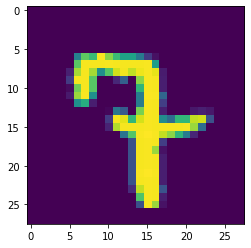

In [ ]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [ ]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([Flatten(input_shape=(28,28)), 
                    Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)), 
                    Dense(10, activation=tf.nn.softmax)])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(training_images, training_labels, epochs=5, validation_split=0.15)

Epoch 1/5
1594/1594 [==============================] - 9s 4ms/step - loss: 0.4144 - accuracy: 0.9061 - val_loss: 0.2697 - val_accuracy: 0.9444
Epoch 2/5
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9472 - val_loss: 0.2139 - val_accuracy: 0.9609
Epoch 3/5
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2203 - accuracy: 0.9580 - val_loss: 0.2169 - val_accuracy: 0.9553
Epoch 4/5
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2000 - accuracy: 0.9620 - val_loss: 0.1870 - val_accuracy: 0.9652
Epoch 5/5
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1859 - accuracy: 0.9659 - val_loss: 0.1827 - val_accuracy: 0.9671


Evaluate the model on the test images

In [ ]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9756
Accuracy on the testing images is 97.5600004196167
